In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt

In [2]:
raw_brux = mne.io.read_raw_edf("../../../Data/cap-sleep-database-1.0.0/brux1.edf", preload=True)

Extracting EDF parameters from /home/victoria/Documents/Uni/2025 T1/SIT723/Data/cap-sleep-database-1.0.0/brux1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7342591  =      0.000 ... 14340.998 secs...


/tmp/ipykernel_455323/549127425.py:1: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw_brux = mne.io.read_raw_edf("../../../Data/cap-sleep-database-1.0.0/brux1.edf", preload=True)
/tmp/ipykernel_455323/549127425.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_brux = mne.io.read_raw_edf("../../../Data/cap-sleep-database-1.0.0/brux1.edf", preload=True)
/tmp/ipykernel_455323/549127425.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_brux = mne.io.read_raw_edf("../../../Data/cap-sleep-database-1.0.0/brux1.edf", preload=True)


In [17]:
print(raw_brux.info)
print(raw_brux.info.ch_names)
print(raw_brux.duration)
print(raw_brux.info['meas_date'])

<Info | 8 non-empty values
 bads: []
 ch_names: Fp2-F4, F4-C4, C4-P4, P4-O2, F8-T4, T4-T6, FP1-F3, F3-C3, C3-P3, ...
 chs: 18 EEG
 custom_ref_applied: False
 highpass: 10.0 Hz
 lowpass: 30.0 Hz
 meas_date: 2010-01-01 21:54:57 UTC
 nchan: 18
 projs: []
 sfreq: 512.0 Hz
 subject_info: <subject_info | his_id: >
>
['Fp2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'F8-T4', 'T4-T6', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'F7-T3', 'T3-T5', 'C4-A1', 'ROC-LOC', 'EMG1-EMG2', 'ECG1-ECG2', 'DX1-DX2', 'SX1-SX2']
14341.0
2010-01-01 21:54:57+00:00
Channels marked as bad:
none


In [4]:
# raw_brux.plot(picks=['ECG1-ECG2'])

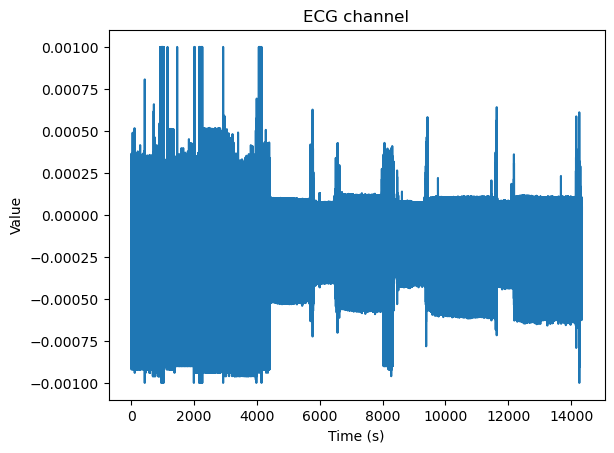

In [5]:
idx = raw_brux.ch_names.index('ECG1-ECG2')
event_data, times = raw_brux[idx, :]

plt.plot(times, event_data[0])
plt.title("ECG channel")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.show()

In [6]:
print(raw_brux.describe(True))

         name type unit       min            Q1        median            Q3  \
ch                                                                            
0      Fp2-F4  eeg    V -0.001000 -3.189866e-06  7.631258e-08  3.678266e-06   
1       F4-C4  eeg    V -0.001000 -3.525641e-06  4.578755e-08  3.891941e-06   
2       C4-P4  eeg    V -0.001000 -3.434066e-06  4.578755e-08  3.769841e-06   
3       P4-O2  eeg    V -0.001000 -3.495116e-06  1.526252e-08  3.830891e-06   
4       F8-T4  eeg    V -0.001000 -3.403541e-06  4.578755e-08  3.769841e-06   
5       T4-T6  eeg    V -0.001000 -3.800366e-06  4.578755e-08  4.197192e-06   
6      FP1-F3  eeg    V -0.001000 -3.525641e-06  7.631258e-08  3.922466e-06   
7       F3-C3  eeg    V -0.001000 -3.556166e-06  1.526252e-08  3.830891e-06   
8       C3-P3  eeg    V -0.001000 -3.311966e-06  1.526252e-08  3.647741e-06   
9       P3-O1  eeg    V -0.001000 -3.006716e-06  1.526252e-08  3.311966e-06   
10      F7-T3  eeg    V -0.001000 -3.830891e-06  4.5

In [7]:
raw_brux.set_channel_types({'ECG1-ECG2': 'ecg'})

<RawEDF | brux1.edf, 18 x 7342592 (14341.0 s), ~1008.4 MiB, data loaded>

In [8]:
ecg_events, _, _ = mne.preprocessing.find_ecg_events(raw_brux)
# raw_brux.plot(events=ecg_events, event_color='r', duration=10, start=0, picks='ECG1-ECG2')

Using channel ECG1-ECG2 to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 5120 samples (10.000 s)

Number of ECG events detected : 10481 (average pulse 43.85049857053204 / min.)


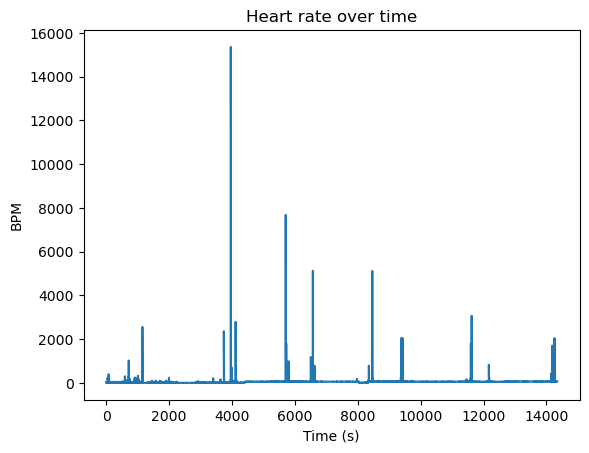

In [9]:
# calculate HRV
beat_times = raw_brux.times[ecg_events[:, 0]]
rr_intervals = np.diff(beat_times)
heart_rate = 60. / rr_intervals

import matplotlib.pyplot as plt
plt.plot(beat_times[1:], heart_rate)
plt.title("Heart rate over time")
plt.xlabel("Time (s)")
plt.ylabel("BPM")
plt.show()

In [13]:
import numpy as np
import pandas as pd
from datetime import datetime
import mne

def parse_time_str(t_str):
    """Parses time in hh.mm.ss format to seconds since midnight."""
    t_str = t_str.replace(":", ".")
    t_obj = datetime.strptime(t_str, "%H.%M.%S")
    return t_obj.hour * 3600 + t_obj.minute * 60 + t_obj.second

def read_remlogic_txt_annotations(file_path, meas_date)  -> mne.Annotations:
    """
    Parses a REMlogic exported .txt annotation file and returns MNE-compatible annotations.
    
    Parameters:
        file_path (str): Path to the REMlogic .txt file.
    
    Returns:
        annotations (mne.Annotations): MNE annotations object containing CAP events.
        hypnogram (pd.DataFrame): Sleep stage annotations.
    """

    meas_date = meas_date.replace(tzinfo=None)

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    header_found = False
    data_lines = []
    cols = []
    for line in lines:
        if line.strip().startswith("Sleep Stage"):
            cols = line.split('\t')
            header_found = True
            continue
        if header_found:
            if line.strip():  # skip blank lines
                parts = line.split('\t')
                if len(parts) < len(cols):
                    continue
                data_lines.append(line.strip())

    df = pd.DataFrame([l.split('\t') for l in data_lines],
                      columns=cols)

    # Normalize column types
    df['Seconds'] = df['Time [hh:mm:ss]'].apply(parse_time_str)
    df['Duration[s]'] = pd.to_numeric(df['Duration[s]'], errors='coerce')
    
    # Detect midnight rollover and fix wraparound
    seconds = df['Seconds'].to_numpy()
    adjusted_seconds = []
    offset = 0
    for i in range(len(seconds)):
        if i > 0 and seconds[i] < seconds[i - 1]:
            offset += 86400  # Add 24h on rollover
        adjusted_seconds.append(seconds[i] + offset)

    first_event_datetime = datetime.combine(meas_date.date(), datetime.min.time()) + pd.to_timedelta(adjusted_seconds, unit='s')
    df['AbsoluteTime'] = first_event_datetime
    df['RelativeToMeas'] = (df['AbsoluteTime'] - meas_date).dt.total_seconds()

    
    cap_df = df[df['Event'].str.contains(r'^(MCAP-A|SLEEP-)', na=False)].copy()
    cap_onsets = cap_df['RelativeToMeas'].values.astype(float)
    cap_durations = cap_df['Duration[s]'].values.astype(float)
    cap_descriptions = cap_df['Event'].values

    # Create MNE Annotations
    annotations = mne.Annotations(onset=cap_onsets,
                                   duration=cap_durations,
                                   description=cap_descriptions)

    return annotations

In [14]:
annotations = read_remlogic_txt_annotations("../../../Data/cap-sleep-database-1.0.0/brux1.txt", raw_brux.info['meas_date'])

/tmp/ipykernel_455323/1222693800.py:67: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cap_df = df[df['Event'].str.contains(r'^(MCAP-A|SLEEP-)', na=False)].copy()


In [15]:
anno_brux = raw_brux.set_annotations(annotations)

/tmp/ipykernel_455323/1160644324.py:1: RuntimeWarning: Omitted 773 annotation(s) that were outside data range.
  anno_brux = raw_brux.set_annotations(annotations)
/tmp/ipykernel_455323/1160644324.py:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  anno_brux = raw_brux.set_annotations(annotations)


In [16]:
anno_brux.plot(start=0, duration=10, scalings='auto', title='ECG with CAP Annotations', picks=['ECG1-ECG2'])

Using qt as 2D backend.


In [18]:
raw_n = mne.io.read_raw_edf("../../../Data/cap-sleep-database-1.0.0/n1.edf")

Extracting EDF parameters from /home/victoria/Documents/Uni/2025 T1/SIT723/Data/cap-sleep-database-1.0.0/n1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_455323/4058425399.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_n = mne.io.read_raw_edf("../../../Data/cap-sleep-database-1.0.0/n1.edf")
/tmp/ipykernel_455323/4058425399.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_n = mne.io.read_raw_edf("../../../Data/cap-sleep-database-1.0.0/n1.edf")
/tmp/ipykernel_455323/4058425399.py:1: RuntimeWarning: Highpass cutoff frequency 10.0 is greater than lowpass cutoff frequency 3.0, setting values to 0 and Nyquist.
  raw_n = mne.io.read_raw_edf("../../../Data/cap-sleep-database-1.0.0/n1.edf")


In [20]:
annotations_n = read_remlogic_txt_annotations("../../../Data/cap-sleep-database-1.0.0/n1.txt", raw_n.info['meas_date'])
anno_n = raw_n.set_annotations(annotations_n)
anno_n.plot(start=0, duration=10, scalings='auto', title='ECG with CAP Annotations', picks=['ECG1-ECG2'])

/tmp/ipykernel_455323/1222693800.py:67: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cap_df = df[df['Event'].str.contains(r'^(MCAP-A|SLEEP-)', na=False)].copy()
/tmp/ipykernel_455323/4255880106.py:3: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  anno_n.plot(start=0, duration=10, scalings='auto', title='ECG with CAP Annotations', picks=['ECG1-ECG2'])
/tmp/ipykernel_455323/4255880106.py:3: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  anno_n.plot(start=0, duration=10, scalings='auto', title='ECG with CAP Annotations', picks=['ECG1-ECG2'])
/home/victoria/anaconda3/envs/m

/home/victoria/anaconda3/envs/mne/lib/python3.13/site-packages/mne_qt_browser/_pg_figure.py:3472: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  data_chunk, times_chunk = browser._load_data(start, stop)
/home/victoria/anaconda3/envs/mne/lib/python3.13/site-packages/mne_qt_browser/_pg_figure.py:3472: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  data_chunk, times_chunk = browser._load_data(start, stop)
/home/victoria/anaconda3/envs/mne/lib/python3.13/site-packages/mne_qt_browser/_pg_figure.py:3472: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also htt

In [16]:
raw_n16 = mne.io.read_raw_edf("../../../Data/cap-sleep-database-1.0.0/n16.edf", preload=True)

Extracting EDF parameters from /home/victoria/Documents/Uni/2025 T1/SIT723/Data/cap-sleep-database-1.0.0/n16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3079999  =      0.000 ... 30799.990 secs...


In [17]:
print(raw_n16.info)
print(raw_n16.info.ch_names)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp2-F4, F4-C4, C4-P4, P4-O2, C4-A1
 chs: 5 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 2006-01-01 22:34:47 UTC
 nchan: 5
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: >
>
['Fp2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'C4-A1']


In [ ]:
raw_nfle22 = mne.io.read_raw_edf("../../../Data/cap-sleep-database-1.0.0/nfle22.edf", preload=True)
print(raw_nfle22.duration)

Extracting EDF parameters from /home/victoria/Documents/Uni/2025 T1/SIT723/Data/cap-sleep-database-1.0.0/nfle22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_455193/864761175.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_nfle22 = mne.io.read_raw_edf("../../../Data/cap-sleep-database-1.0.0/nfle22.edf", preload=True)
/tmp/ipykernel_455193/864761175.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_nfle22 = mne.io.read_raw_edf("../../../Data/cap-sleep-database-1.0.0/nfle22.edf", preload=True)


Reading 0 ... 17111551  =      0.000 ... 33420.998 secs...


In [24]:
annotations_nfle22 = read_remlogic_txt_annotations("../../../Data/cap-sleep-database-1.0.0/nfle22.txt")
anno_nfle22 = raw_nfle22.set_annotations(annotations_nfle22)


[np.float64(0.0), np.float64(30.0), np.float64(60.0), np.float64(90.0), np.float64(120.0), np.float64(150.0), np.float64(180.0), np.float64(210.0), np.float64(240.0), np.float64(270.0), np.float64(300.0), np.float64(330.0), np.float64(360.0), np.float64(390.0), np.float64(420.0), np.float64(450.0), np.float64(480.0), np.float64(510.0), np.float64(540.0), np.float64(570.0), np.float64(600.0), np.float64(630.0), np.float64(654.0), np.float64(660.0), np.float64(690.0), np.float64(695.0), np.float64(718.0), np.float64(720.0), np.float64(749.0), np.float64(750.0), np.float64(763.0), np.float64(780.0), np.float64(808.0), np.float64(810.0), np.float64(837.0), np.float64(840.0), np.float64(863.0), np.float64(870.0), np.float64(876.0), np.float64(899.0), np.float64(900.0), np.float64(930.0), np.float64(933.0), np.float64(958.0), np.float64(960.0), np.float64(971.0), np.float64(987.0), np.float64(990.0), np.float64(1020.0), np.float64(1039.0), np.float64(1049.0), np.float64(1050.0), np.float64(1

/tmp/ipykernel_453499/1622678362.py:60: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cap_df = df[df['Event'].str.contains(r'^(MCAP-A|SLEEP-)', na=False)].copy()


In [25]:
anno_nfle22.plot(start=0, duration=10, scalings='auto', title='nfle22', picks=['ECG1-ECG2'])

/tmp/ipykernel_453499/2276372711.py:1: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  anno_nfle22.plot(start=0, duration=10, scalings='auto', title='nfle22', picks=['ECG1-ECG2'])
/tmp/ipykernel_453499/2276372711.py:1: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  anno_nfle22.plot(start=0, duration=10, scalings='auto', title='nfle22', picks=['ECG1-ECG2'])
/home/victoria/anaconda3/envs/mne/lib/python3.13/site-packages/pyqtgraph/graphicsItems/ViewBox/ViewBox.py:1680: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-pyth

/home/victoria/anaconda3/envs/mne/lib/python3.13/site-packages/mne_qt_browser/_pg_figure.py:3472: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  data_chunk, times_chunk = browser._load_data(start, stop)
/home/victoria/anaconda3/envs/mne/lib/python3.13/site-packages/mne_qt_browser/_pg_figure.py:3472: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  data_chunk, times_chunk = browser._load_data(start, stop)
/home/victoria/anaconda3/envs/mne/lib/python3.13/site-packages/mne_qt_browser/_pg_figure.py:3472: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also htt